In [1]:
import pandas as pd
import numpy as np

import os

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="ticks")

%matplotlib inline

In [2]:
base_dir = 'data/raw'
os.listdir(base_dir)

['salts_water_basic_IR_baseline.csv',
 '.DS_Store',
 'salts_water_basic_output_i.csv',
 'salts_water_basic_IR.csv',
 'salts_water_basic_output_s.csv',
 'salts_water_basic_OA.csv']

In [44]:
filename = 'salts_water_basic_OA.csv'
df = pd.read_csv(f'{base_dir}/{filename}')
df = df.drop(columns=['Unnamed: 0'])
df.head()

,190,191,192,193,194,195,196,197,198,199,...,1091,1092,1093,1094,1095,1096,1097,1098,1099,1100
0,2.7115,2.9593,3.0339,3.3297,3.2065,3.30560,3.22720,3.28420,3.38690,3.33040,...,0.000641,0.000763,0.000351,0.000671,0.000900,0.000488,0.000748,0.000671,0.000534,0.000900
1,2.9078,2.9396,2.8984,3.1246,3.3011,3.17920,3.32760,3.37530,3.35000,3.41740,...,0.000290,0.000305,-0.000076,0.000183,0.000412,-0.000046,0.000229,0.000198,0.000061,0.000458
2,2.8516,3.4251,3.1201,3.1306,3.1346,3.45920,3.30900,3.40450,3.67110,3.53670,...,0.001130,0.001140,0.000763,0.001020,0.001220,0.000809,0.001130,0.001010,0.000900,0.001390
3,2.6598,3.2798,3.0815,3.2515,3.6696,3.40710,3.71290,3.51930,3.44000,3.54950,...,0.000381,0.000366,0.000030,0.000336,0.000565,0.000107,0.000443,0.000290,0.000198,0.000549
4,1.8138,1.6950,1.4765,1.2387,1.0456,0.87405,0.73227,0.60864,0.50514,0.42422,...,0.038770,0.039000,0.038770,0.039250,0.039690,0.039440,0.039960,0.040050,0.040130,0.040590


In [45]:
filename = 'salts_water_basic_IR_baseline.csv'
baseline = pd.read_csv(f'{base_dir}/{filename}')

In [46]:
filename = 'salts_water_basic_output_i.csv'
outputs = pd.read_csv(f'{base_dir}/{filename}')
outputs = outputs.drop(columns=['Unnamed: 0'])
outputs = outputs.drop(index=[0])
outputs.index -=1
outputs = outputs.sort_index()
outputs.head()

,Zn,Cu,Li,Fe,Ni,NH4,SO4,NO3
0,0.0,0.0,0.0,0.0,0.0000,0.1452,0.05005,0.0451
1,0.0,0.0,0.0,0.0,0.0000,0.2904,0.10010,0.0902
2,0.0,0.0,0.0,0.0,0.0000,0.4356,0.15015,0.1353
3,0.0,0.0,0.0,0.0,0.0000,0.5808,0.20020,0.1804
4,0.0,0.0,0.0,0.0,0.2431,0.0000,0.24310,0.0000


In [47]:
df.shape, outputs.shape

((3744, 911), (3744, 8))

In [48]:
x = np.array(df.columns)
x = np.apply_along_axis(lambda el: np.float64(el), 0, x)
x.shape

(911,)

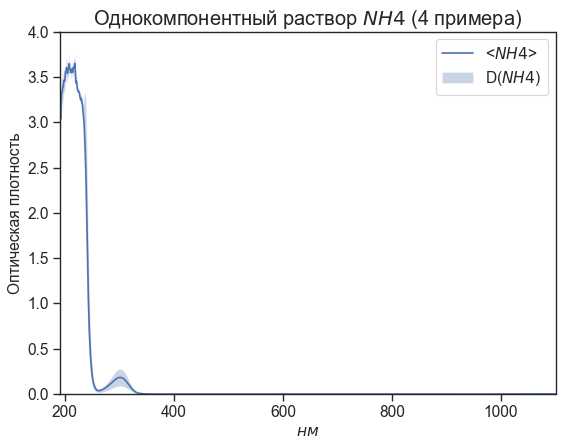

In [64]:
cations = (outputs['Zn'] == 0) & (outputs['Cu'] == 0) & (outputs['Li'] == 0) & (outputs['Fe'] == 0) & (outputs['Ni'] == 0) & (outputs['NH4'] == 0)
y = df[cations]
mean = y.mean(); std = y.std()
y1 = mean - std; y2 = mean + std

plt.figure(figsize=(8, 6), dpi=80)
plt.plot(x, mean, label='<$NH4$>') 
plt.fill_between(x, y1, y2, alpha=0.3, label='D($NH4$)')

plt.ylim([0., 4])
plt.xlim([x[0], x[-1]])
plt.legend(fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('$нм$', fontsize=14)
plt.ylabel('Оптическая плотность', fontsize=14)

plt.title(f'Однокомпонентный раствор $NH4$ ({y.shape[0]} примера)',fontsize=18)
plt.savefig('images/oa/NH4.jpeg', dpi=300, format='jpeg')
plt.show()

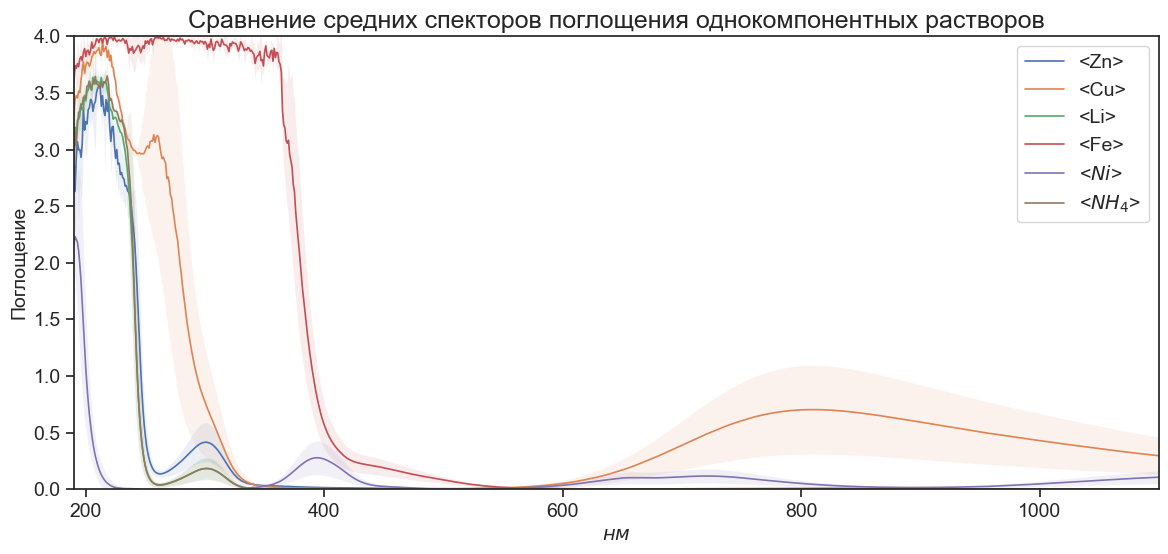

In [75]:
plt.figure(figsize=(14, 6), dpi=100)

cations = (outputs['Zn'] != 0) & (outputs['Cu'] == 0) & (outputs['Li'] == 0) & (outputs['Fe'] == 0) & (outputs['Ni'] == 0) & (outputs['NH4'] == 0)
y = df[cations]
mean = y.mean(); std = y.std()
y1 = mean - std; y2 = mean + std
plt.plot(x, mean, label='<Zn>',linewidth=1.2) 
plt.fill_between(x, y1, y2, alpha=0.1)

cations = (outputs['Zn'] == 0) & (outputs['Cu'] != 0) & (outputs['Li'] == 0) & (outputs['Fe'] == 0) & (outputs['Ni'] == 0) & (outputs['NH4'] == 0)
y = df[cations]
mean = y.mean(); std = y.std()
y1 = mean - std; y2 = mean + std
plt.plot(x, mean, label='<Cu>',linewidth=1.2) 
plt.fill_between(x, y1, y2, alpha=0.1)

cations = (outputs['Zn'] == 0) & (outputs['Cu'] == 0) & (outputs['Li'] != 0) & (outputs['Fe'] == 0) & (outputs['Ni'] == 0) & (outputs['NH4'] == 0)
y = df[cations]
mean = y.mean(); std = y.std()
y1 = mean - std; y2 = mean + std
plt.plot(x, mean, label='<Li>',linewidth=1.2) 
plt.fill_between(x, y1, y2, alpha=0.1)

cations = (outputs['Zn'] == 0) & (outputs['Cu'] == 0) & (outputs['Li'] == 0) & (outputs['Fe'] != 0) & (outputs['Ni'] == 0) & (outputs['NH4'] == 0)
y = df[cations]
mean = y.mean(); std = y.std()
y1 = mean - std; y2 = mean + std
plt.plot(x, mean, label='<Fe>',linewidth=1.2) 
plt.fill_between(x, y1, y2, alpha=0.1)

cations = (outputs['Zn'] == 0) & (outputs['Cu'] == 0) & (outputs['Li'] == 0) & (outputs['Fe'] == 0) & (outputs['Ni'] != 0) & (outputs['NH4'] == 0)
y = df[cations]
mean = y.mean(); std = y.std()
y1 = mean - std; y2 = mean + std
plt.plot(x, mean, label='<$Ni$>', linewidth=1.2) 
plt.fill_between(x, y1, y2, alpha=0.1)

cations = (outputs['Zn'] == 0) & (outputs['Cu'] == 0) & (outputs['Li'] == 0) & (outputs['Fe'] == 0) & (outputs['Ni'] == 0) & (outputs['NH4'] != 0)
y = df[cations]
mean = y.mean(); std = y.std()
y1 = mean - std; y2 = mean + std
plt.plot(x, mean, label='<$NH_4$>', linewidth=1.2) 
plt.fill_between(x, y1, y2, alpha=0.1)

#plt.plot(x, baseline.mean(), label='$H_2O$', linewidth=2)


plt.ylim([0.00, 4])
plt.xlim([x[0], x[-1]])
plt.legend(fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('$нм$', fontsize=14)
plt.ylabel('Поглощение', fontsize=14)

plt.title(f'Сравнение средних спекторов поглощения однокомпонентных растворов',fontsize=18)
plt.savefig('./images/oa/solutions_comparing.jpeg', dpi=300, format='jpeg')
plt.show()

### PCA and Corr analysis

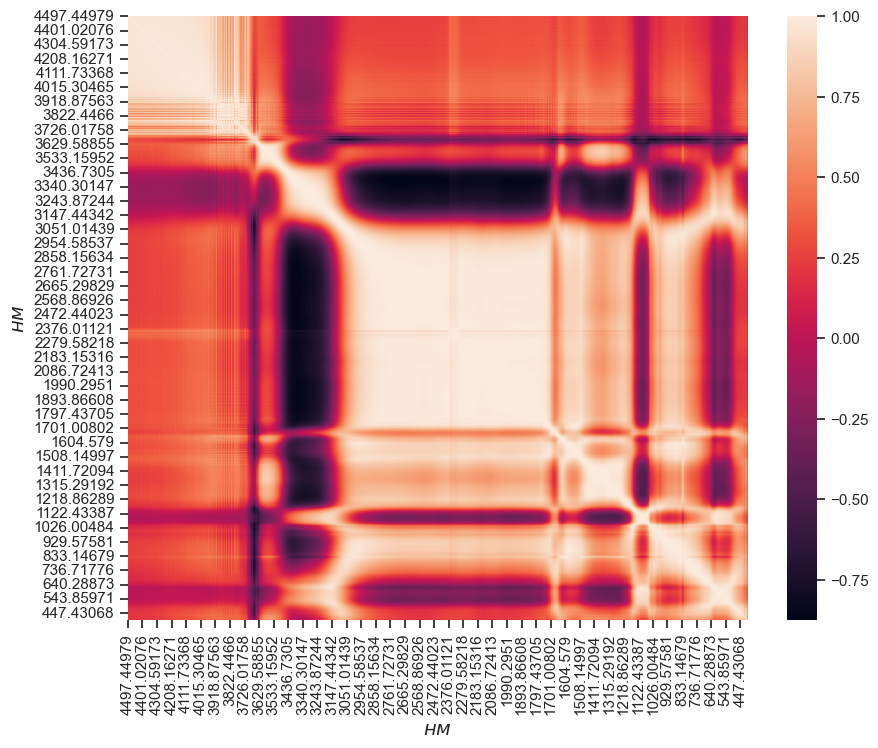

In [57]:
cations = (outputs['Fe'] != 0) & (outputs['Cu']== 0) & (outputs['Li'] == 0) & (outputs['Ni'] == 0) & (outputs['NH4'] == 0)

corr = df.corr()
plt.figure(figsize=(10, 8), dpi=100)
sns.heatmap(corr, xticklabels=50, yticklabels=50)
plt.xlabel('$нм$', fontsize=14)
plt.ylabel('$нм$', fontsize=14)
plt.show()

In [75]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc 1', 'pc 2'])
principalDf.head()

,pc 1,pc 2
0,-0.885612,-0.663553
1,-0.815335,-0.633471
2,-0.760115,-0.516294
3,-0.676122,-0.424024
4,-0.988512,-0.448618


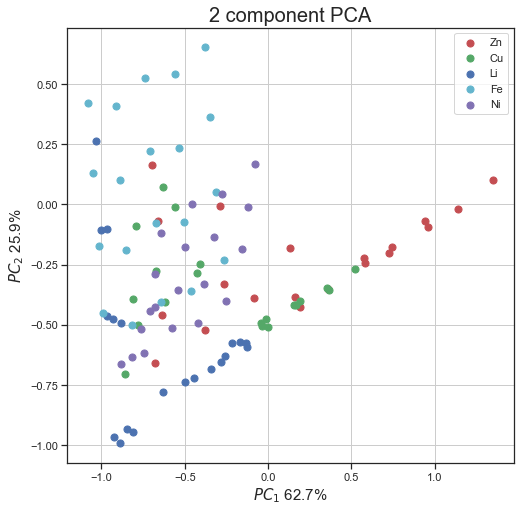

In [76]:
fig = plt.figure(figsize = (8,8))
cov = pca.explained_variance_ratio_

ax = fig.add_subplot(1,1,1) 
ax.set_xlabel(f'$PC_1$ {cov[0]*100:.1f}%', fontsize = 15)
ax.set_ylabel(f'$PC_2$ {cov[1]*100:.1f}%', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
c = ['r', 'g', 'b', 'c', 'm']

cations = (outputs['Fe'] != 0) & (outputs['Cu'] == 0) & (outputs['Li'] == 0) & (outputs['Ni'] == 0) & (outputs['NH4'] == 0)
dat = principalDf[cations]
x, y = dat['pc 1'], dat['pc 2']
ax.scatter(x,y, c=c[0], s=50, label='Fe')

cations = (outputs['Fe'] == 0) & (outputs['Cu'] != 0) & (outputs['Li'] == 0) & (outputs['Ni'] == 0) & (outputs['NH4'] == 0)
dat = principalDf[cations]
x, y = dat['pc 1'], dat['pc 2']
ax.scatter(x,y, c=c[1], s=50, label='Cu')

cations = (outputs['Fe'] == 0) & (outputs['Cu'] == 0) & (outputs['Li'] != 0) & (outputs['Ni'] == 0) & (outputs['NH4'] == 0)
dat = principalDf[cations]
x, y = dat['pc 1'], dat['pc 2']
ax.scatter(x,y, c=c[2], s=50, label='Li')

cations = (outputs['Fe'] == 0) & (outputs['Cu'] == 0) & (outputs['Li'] == 0) & (outputs['Ni'] != 0) & (outputs['NH4'] == 0)
dat = principalDf[cations]
x, y = dat['pc 1'], dat['pc 2']
ax.scatter(x,y, c=c[3], s=50, label='Ni')

cations = (outputs['Fe'] == 0) & (outputs['Cu'] == 0) & (outputs['Li'] == 0) & (outputs['Ni'] == 0) & (outputs['NH4'] != 0)
dat = principalDf[cations]
x, y = dat['pc 1'], dat['pc 2']
ax.scatter(x,y, c=c[4], s=50, label='NH4')
ax.legend(targets)
plt.savefig('images/ir/pca2.jpeg', dpi=80, format='jpeg')
ax.grid()

In [77]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(df)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc 1', 'pc 2', 'pca 3'])
principalDf.head()

,pc 1,pc 2,pca 3
0,-0.885612,-0.663553,0.048932
1,-0.815335,-0.633471,0.094657
2,-0.760115,-0.516294,0.075150
3,-0.676122,-0.424024,0.089860
4,-0.988512,-0.448618,0.007199


/var/folders/_j/kkrbjs8x17d4gnh05zpxgjyc0000gn/T/ipykernel_15300/176040314.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d', elev=20, azim=160)


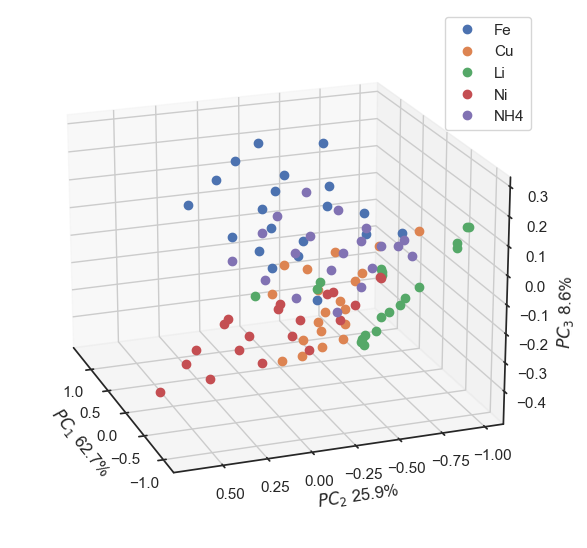

In [78]:
cov = pca.explained_variance_ratio_
fig = plt.figure(figsize=(12, 7), dpi=100)
ax = fig.gca(projection='3d', elev=20, azim=160)

cations = (outputs['Fe'] != 0) & (outputs['Cu'] == 0) & (outputs['Li'] == 0) & (outputs['Ni'] == 0) & (outputs['NH4'] == 0)
dat = principalDf[cations]
ax.plot(dat.iloc[:, 0], dat.iloc[:, 1], dat.iloc[:, 2], 'o', label='Fe')

cations = (outputs['Fe'] == 0) & (outputs['Cu'] != 0) & (outputs['Li'] == 0) & (outputs['Ni'] == 0) & (outputs['NH4'] == 0)
dat = principalDf[cations]
ax.plot(dat.iloc[:, 0], dat.iloc[:, 1], dat.iloc[:, 2], 'o', label='Cu')

cations = (outputs['Fe'] == 0) & (outputs['Cu'] == 0) & (outputs['Li'] != 0) & (outputs['Ni'] == 0) & (outputs['NH4'] == 0)
dat = principalDf[cations]
ax.plot(dat.iloc[:, 0], dat.iloc[:, 1], dat.iloc[:, 2], 'o', label='Li')

cations = (outputs['Fe'] == 0) & (outputs['Cu'] == 0) & (outputs['Li'] == 0) & (outputs['Ni'] != 0) & (outputs['NH4'] == 0)
dat = principalDf[cations]
ax.plot(dat.iloc[:, 0], dat.iloc[:, 1], dat.iloc[:, 2], 'o', label='Ni')

cations = (outputs['Fe'] == 0) & (outputs['Cu'] == 0) & (outputs['Li'] == 0) & (outputs['Ni'] == 0) & (outputs['NH4'] != 0)
dat = principalDf[cations]
ax.plot(dat.iloc[:, 0], dat.iloc[:, 1], dat.iloc[:, 2], 'o', label='NH4')

ax.set_xlabel(f'$PC_1$ {cov[0]*100:.1f}%')
ax.set_ylabel(f'$PC_2$ {cov[1]*100:.1f}%')
ax.set_zlabel(f'$PC_3$ {cov[2]*100:.1f}%')
ax.legend()
plt.savefig('images/ir/pca3.jpeg', dpi=80, format='jpeg')
plt.show()